# DECISION TREE 

> **DECISION TREES**
- Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. 
- The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.
- Decision Tree is one of the most powerful and popular algorithm. 
- It works for both continuous as well as categorical output variables.



> A decision tree consists of three types of **nodes**:
  - Decision nodes 
  - Chance nodes
  - End nodes

> **Decision rules** 
- The decision tree can be linearized into decision rules,
  - where the outcome is the contents of the leaf node, 
  - and the conditions along the path form a conjunction in the if clause. 
- In general, the rules have the form:
  - *if* `condition1` *and* `condition2` *and* `condition3` *then* `outcome`

> - Assumptions we make while using Decision tree :
  - At the beginning, we consider the whole training set as the root.
  - Attributes are assumed to be categorical for information gain and for gini index, attributes are assumed to be continuous.
  - On the basis of attribute values records are distributed recursively.
  - We use statistical methods for ordering attributes as root or internal node

## Title: Wine Quality :
   - These datasets can be viewed as classification or regression tasks.
   - The classes are ordered and not balanced (e.g. there are munch more normal wines than
     excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
     or poor wines.
   - Also, we are not sure if all input variables are relevant. So
     it could be interesting to test feature selection methods. 



## Number of Instances: red wine - 1599; white wine - 4898. 

## Attribute information:
  - Input variables (based on physicochemical tests):
      1. fixed acidity (tartaric acid - g / dm^3)
      2. volatile acidity (acetic acid - g / dm^3)
      3. citric acid (g / dm^3)
      4. residual sugar (g / dm^3)
      5. chlorides (sodium chloride - g / dm^3
      6. free sulfur dioxide (mg / dm^3)
      7. total sulfur dioxide (mg / dm^3)
      8. density (g / cm^3)
      9. pH
      10. sulphates (potassium sulphate - g / dm3)
      11. alcohol (% by volume)
  - Output variable (based on sensory data): 
      - quality (score between 0 and 10)

## Missing Attribute Values: None



### Description of attributes:

   1 - fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

   2 - volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

   3 - citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines

   4 - residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

   5 - chlorides: the amount of salt in the wine

   6 - free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

   7 - total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

   8 - density: the density of water is close to that of water depending on the percent alcohol and sugar content

   9 - pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

   10 - sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

   11 - alcohol: the percent alcohol content of the wine

   Output variable (based on sensory data): 
   12 - quality (score between 0 and 10)


> # Objectives:
 - To explore the physiocochemical properties of red wine
 - To determine an optimal machine learning model for red wine quality classification


# CART (Classification and Regression Trees):
 - Classification and Regression Trees or CART for short is an acronym introduced by Leo Breiman to refer to Decision Tree algorithms that can be used for classification or regression predictive modeling problems.

- The representation of the CART model is a binary tree. This is the same binary tree from algorithms and data structures, nothing too fancy (each node can have zero, one or two child nodes).

- A node represents a single input variable (X) and a split point on that variable, assuming the variable is numeric. The leaf nodes (also called terminal nodes) of the tree contain an output variable (y) which is used to make a prediction.

- Once created, a tree can be navigated with a new row of data following each branch with the splits until a final prediction is made.

- Creating a binary decision tree is actually a process of dividing up the input space. A greedy approach is used to divide the space called recursive binary splitting. This is a numerical procedure where all the values are lined up and different split points are tried and tested using a cost function.

- The split with the best cost (lowest cost because we minimize cost) is selected. All input variables and all possible split points are evaluated and chosen in a greedy manner based on the cost function.

- **Regression**: The cost function that is minimized to choose split points is the sum squared error across all training samples that fall within the rectangle.
- **Classification**: The Gini cost function is used which provides an indication of how pure the nodes are, where node purity refers to how mixed the training data assigned to each node is.
- Splitting continues until nodes contain a minimum number of training examples or a maximum tree depth is reached.

## IMPLEMENTATION DTs 

#### Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
%matplotlib inline


#### Loading

In [3]:
wine_df = pd.read_csv("F:/mydata/wineQualityReds.csv")
wine_df.drop(wine_df.columns[0],axis=1,inplace=True)
wine_df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### To Check Data is Numeric or Categorical?


In [4]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed.acidity           1599 non-null float64
volatile.acidity        1599 non-null float64
citric.acid             1599 non-null float64
residual.sugar          1599 non-null float64
chlorides               1599 non-null float64
free.sulfur.dioxide     1599 non-null float64
total.sulfur.dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### Summary of the data

In [5]:
wine_df.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


####  Correlation using Heatmap

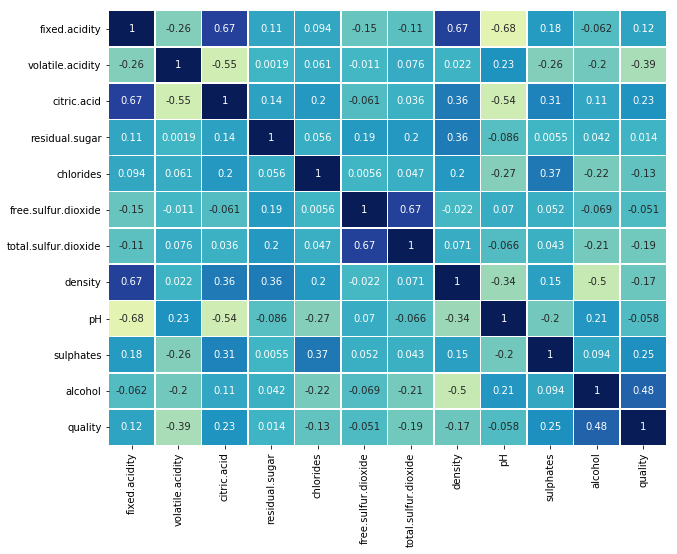

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(wine_df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()


## Splitting the dataset

In [11]:
X_train, X_test, y_train, y_test =train_test_split(wine_df.drop('quality',axis=1), wine_df['quality'], test_size=.25,
                                                   random_state=22)


In [12]:
X_train.shape,X_test.shape

((1199, 11), (400, 11))

## Model1:- Criterion='gini'

In [13]:
model1=DecisionTreeClassifier()

In [14]:
model1.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [15]:
preds = model1.predict(X_test)

## Evaluation Metrics

In [16]:
print(accuracy_score(y_test,preds))


0.62


In [17]:
print(recall_score(y_test,preds,average="weighted"))


0.62


In [18]:
print(precision_score(y_test,preds,average="weighted"))


0.6234999827930346


In [19]:
print(f1_score(y_test,preds,average="weighted"))


0.6215430693919615


In [20]:
print(metrics.classification_report(y_test,preds))

             precision    recall  f1-score   support

          4       0.00      0.00      0.00         9
          5       0.72      0.69      0.70       181
          6       0.60      0.63      0.62       161
          7       0.48      0.48      0.48        46
          8       0.00      0.00      0.00         3

avg / total       0.62      0.62      0.62       400



## Model1:- Criterion='entropy'

In [21]:
model2=DecisionTreeClassifier(criterion='entropy')

In [22]:
model2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
preds = model1.predict(X_test)

## Evaluation Metrics

In [24]:
print(accuracy_score(y_test,preds))


0.62


In [25]:
print(recall_score(y_test,preds,average="weighted"))

0.62


In [26]:
print(precision_score(y_test,preds,average="weighted"))


0.6234999827930346


In [27]:
print(f1_score(y_test,preds,average="weighted"))


0.6215430693919615


In [28]:
print(metrics.classification_report(y_test,preds))

             precision    recall  f1-score   support

          4       0.00      0.00      0.00         9
          5       0.72      0.69      0.70       181
          6       0.60      0.63      0.62       161
          7       0.48      0.48      0.48        46
          8       0.00      0.00      0.00         3

avg / total       0.62      0.62      0.62       400



# Advantages of decision trees are:

  - Simple to understand and to interpret. Trees can be visualised.
  - Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.
  - The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.
  - Able to handle both numerical and categorical data. Other techniques are usually specialised in analysing datasets that have only one type of variable. See algorithms for more information.
  - Able to handle multi-output problems.
  - Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.
  - Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.
  - Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

# Disadvantages of decision trees include:

   - They are unstable, meaning that a small change in the data can lead to a large change in the structure of the optimal decision tree.
   - They are often relatively inaccurate. Many other predictors perform better with similar data. This can be remedied by replacing a single decision tree with a random forest of decision trees, but a random forest is not as easy to interpret as a single decision tree.
   - For data including categorical variables with different number of levels, information gain in decision trees is biased in favor of those attributes with more levels
    - Calculations can get very complex, particularly if many values are uncertain and/or if many outcomes are linked.

## Nonparametric Machine Learning Algorithms
- Algorithms that do not make strong assumptions about the form of the mapping function are called nonparametric machine learning algorithms. By not making assumptions, they are free to learn any functional form from the training data.

- Nonparametric methods are good when you have a lot of data and no prior knowledge, and when you don’t want to worry too much about choosing just the right features.

- Nonparametric methods seek to best fit the training data in constructing the mapping function, whilst maintaining some ability to generalize to unseen data. As such, they are able to fit a large number of functional forms.

- An easy to understand nonparametric model is the k-nearest neighbors algorithm that makes predictions based on the k most similar training patterns for a new data instance. The method does not assume anything about the form of the mapping function other than patterns that are close are likely have a similar output variable.

- Some more examples of popular nonparametric machine learning algorithms are:
  - k-Nearest Neighbors
  - Decision Trees like CART and C4.5
  - Support Vector Machines

- Benefits of Nonparametric Machine Learning Algorithms:
  - Flexibility: Capable of fitting a large number of functional forms.
  - Power: No assumptions (or weak assumptions) about the underlying function.
  - Performance: Can result in higher performance models for prediction.

- Limitations of Nonparametric Machine Learning Algorithms:
  - More data: Require a lot more training data to estimate the mapping function.
  - Slower: A lot slower to train as they often have far more parameters to train.
  - Overfitting: More of a risk to overfit the training data and it is harder to explain why specific predictions are made.

# In class lab WAP 
    Data Set Name: IRIS Dataset

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

Id
SepalLengthCm
SepalWidthCm
PetalLengthCm
PetalWidthCm
Species


Using the dataset, perform Decision Tree and classify the Species based on Entropy and Gini Index Method also evaluate all the characteristics

# Take home assignment***

Based on the previous dataset "Titanic Dataset", solve the below questions:

Apply Data Cleaning to the Datasets and then then using Decision Tree classification Algorithm to predict the survival 